## <center> Bike Sharing

### Ask:
Predict the total count of bikes rented during each hour in test set.

### Data:
<br>
<li> Hourly rental data spanning two years.
<li> Training set contains first 19 days of each month.
<li> Test Set contains 20th to end of month.

### Features:
<ol>
<li> datetime - hourly date + timestamp  
<li> season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
<li> holiday - whether the day is considered a holiday
<li> workingday - whether the day is neither a weekend nor holiday
<li> weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
<li> weather - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
<li> weather - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
<li> weather - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
<li> temp - temperature in Celsius
<li> atemp - "feels like" temperature in Celsius
<li> humidity - relative humidity
<li> windspeed - wind speed
<li> casual - number of non-registered user rentals initiated
<li> registered - number of registered user rentals initiated
<li> count - number of total rentals
    </ol>

In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from datetime import datetime
import calendar

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read dataset
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [3]:
#Review training set data
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
#Review test set data
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
df_train.shape, df_test.shape

((10886, 12), (6493, 9))

### Backup data

In [6]:
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

---

In [7]:
#Reviewing datatypes
df_train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [8]:
df_test.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object

In [9]:
#Saving total number of rows in test and train
ntrain = df_train.shape[0]
ntest = df_test.shape[0]

ntrain, ntest

(10886, 6493)

In [14]:
#Let's remove few columns from training set as they are not available in test set.
dcols = ['count', 'casual', 'registered']

#Let's backkup the data first
df_target = df_train[dcols]

df_target.head(3)

,count,casual,registered
0,16,3,13
1,40,8,32
2,32,5,27


In [15]:
#Let's remove them
df_train.drop(dcols, inplace=True, axis=1)

In [16]:
df_train.shape, df_test.shape

((10886, 9), (6493, 9))

In [47]:
#For submission
srs_timestamp = df_test['datetime']

In [20]:
#Let's concatenate train and test data
df_alldata = pd.concat([df_train, df_test], axis=0)

df_alldata.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0


In [21]:
df_alldata.shape

(17379, 9)

In [22]:
#Let start our EDA with datetime
df_alldata['datetime'] = pd.to_datetime(df_alldata['datetime'])

In [32]:
#New values extracted from datetime -> day, date, hour, month, year
df_alldata['day'] = df_alldata['datetime'].apply(lambda x: calendar.day_name[x.weekday()])
df_alldata['date'] = df_alldata['datetime'].apply(lambda x: x.day)
df_alldata['hour'] = df_alldata['datetime'].apply(lambda x: x.hour)
df_alldata['month'] = df_alldata['datetime'].apply(lambda x: calendar.month_name[x.month])
df_alldata['year'] = df_alldata['datetime'].apply(lambda x:x.year)

df_alldata.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,date,hour,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,Saturday,1,0,January,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,Saturday,1,1,January,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,Saturday,1,2,January,2011


In [34]:
#Let's change few more cols as per their values
df_alldata['season'] = df_alldata['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [35]:
df_alldata['weather'] = df_alldata['weather'].map({1:'Clear-Cloudy', 2:'Misty-Cloudy', 3:'Light Rain-Storm', 4:'Rain-Ice'})

In [36]:
#Let's change holiday and working day as categorical as they were
df_alldata['holiday'] = df_alldata['holiday'].astype('object')
df_alldata['workingday'] = df_alldata['workingday'].astype('object')

In [46]:
#Let's drop datetime column as we extracted information
df_alldata.drop('datetime', inplace=True, axis=1)

In [37]:
#Let's check dataset datatypes
df_alldata.dtypes

datetime      datetime64[ns]
season                object
holiday               object
workingday            object
weather               object
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
day                   object
date                   int64
hour                   int64
month                 object
year                   int64
dtype: object

In [38]:
#Let's get catg features
catg_feats = df_alldata.dtypes[df_alldata.dtypes == 'object'].index
catg_feats

Index(['season', 'holiday', 'workingday', 'weather', 'day', 'month'], dtype='object')

In [44]:
#Let's onehot encode these categorical feats
for col in catg_feats:
    df_temp = pd.get_dummies(df_alldata[col], prefix=col)
    dcol = df_temp.columns[0]
    df_temp.drop(dcol, inplace=True, axis=1) #Dropping dummy variable trap col
    df_alldata.drop(col, inplace=True, axis=1) #Dropping original column
    df_alldata = pd.concat([df_alldata, df_temp], axis=1).reset_index(drop=True)

In [49]:
df_alldata.head(3)

,temp,atemp,humidity,windspeed,date,hour,year,season_Spring,season_Summer,season_Winter,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,9.84,14.395,81,0.0,1,0,2011,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,9.02,13.635,80,0.0,1,1,2011,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,9.02,13.635,80,0.0,1,2,2011,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [73]:
df_alldata['year'] = df_alldata['year'].map({2011:0, 2012:1})

In [77]:
df_alldata['year'].value_counts()

1    8734
0    8645
Name: year, dtype: int64

In [78]:
df_alldata.dtypes

temp                        float64
atemp                       float64
humidity                      int64
windspeed                   float64
date                          int64
hour                          int64
year                          int64
season_Spring                 uint8
season_Summer                 uint8
season_Winter                 uint8
holiday_1                     uint8
workingday_1                  uint8
weather_Light Rain-Storm      uint8
weather_Misty-Cloudy          uint8
weather_Rain-Ice              uint8
day_Monday                    uint8
day_Saturday                  uint8
day_Sunday                    uint8
day_Thursday                  uint8
day_Tuesday                   uint8
day_Wednesday                 uint8
month_August                  uint8
month_December                uint8
month_February                uint8
month_January                 uint8
month_July                    uint8
month_June                    uint8
month_March                 

In [80]:
def rmsle(y, y_pred):
    assert len(y) == len(y_pred), 'Error in actual and prediction length.'
    return np.sqrt(np.mean((np.log1p(y) - np.log1p(y_pred))**2))

#np.sqrt(mean_squared_log_error(y, y_pred))

In [81]:
#Let's split train and test set
df_train = df_alldata[:ntrain]
df_test = df_alldata[ntrain:]

df_train.shape, df_test.shape

((10886, 32), (6493, 32))

In [83]:
## Setting up target variable
target = np.log1p(df_target['count'])

len(target)

10886

### Modelling

In [90]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=10000, objective='reg:squarederror',  random_state=42)

In [94]:
model.fit(df_train.values, target)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [95]:
pred_train = model.predict(df_train.values)

In [96]:
rmsle(target, pred_train)

0.04455752935475116

In [111]:
rmsle(np.expm1(target), np.expm1(pred_train))

0.15877749525399912

In [97]:
pred_test = model.predict(df_test.values)

In [112]:
pred_test = np.expm1(pred_test)

In [113]:
len(pred_test[pred_test<1])

14

In [116]:
sr_target = pd.Series(data=pred_test, name='test_count')

In [118]:
sr_target = sr_target.apply(lambda x: round(x,0))

In [121]:
len(sr_target[sr_target<1])

4

In [102]:
srs_timestamp[:5]

0    2011-01-20 00:00:00
1    2011-01-20 01:00:00
2    2011-01-20 02:00:00
3    2011-01-20 03:00:00
4    2011-01-20 04:00:00
Name: datetime, dtype: object

In [119]:
#Submission file
submission = pd.DataFrame({'datetime':srs_timestamp, 'count':sr_target})
submission.head()

,datetime,count
0,2011-01-20 00:00:00,8.0
1,2011-01-20 01:00:00,3.0
2,2011-01-20 02:00:00,3.0
3,2011-01-20 03:00:00,1.0
4,2011-01-20 04:00:00,1.0


In [122]:
submission.to_csv('submission/xgb_submission.csv', index=False)

In [124]:
#submit 2
#Submission file
submission = pd.DataFrame({'datetime':srs_timestamp, 'count':pred_test})
submission.head()

,datetime,count
0,2011-01-20 00:00:00,8.067056
1,2011-01-20 01:00:00,3.464830
2,2011-01-20 02:00:00,2.511831
3,2011-01-20 03:00:00,1.387447
4,2011-01-20 04:00:00,1.263462


In [125]:
submission.to_csv('submission/xgb_submission2.csv', index=False)

## Model and Parameter Tuning

In [182]:
#List of models to try
from sklearn.linear_model import RidgeCV, Ridge, LassoCV, Lasso, ElasticNetCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import lightgbm as lgbm
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_log_error

In [131]:
X_train, X_test, y_train, y_test = train_test_split(df_train.values, target, test_size=0.3, random_state=42)

In [132]:
X_train.shape, X_test.shape

((7620, 32), (3266, 32))

In [128]:
#Let's find optimum parameters for each model
model_xgb = xgb.XGBRegressor(n_estimators=1000, n_jobs=-1, objective='reg:squarederror', random_state=42)

In [129]:
xgb_param_grid={'max_depth':[3,5],
               'learning_rate':[0.1, 0.3]}

In [134]:
gs_xgb_model = GridSearchCV(param_grid=xgb_param_grid, estimator=model_xgb, cv=8, verbose=2, n_jobs=-1)

In [135]:
gs_xgb_model.fit(X_train, y_train)

Fitting 8 folds for each of 4 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:  2.1min finished


GridSearchCV(cv=8, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1000, n_jobs=-1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=42, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3], 'max_depth': [3, 5]},
             pre_dispatch='2*n_jobs', r

In [137]:
gs_xgb_model.best_score_

0.9589890294750596

In [138]:
gs_xgb_model.best_params_

{'learning_rate': 0.1, 'max_depth': 5}

In [139]:
model_xgb = xgb.XGBRegressor(n_estimators=1000, n_jobs=-1, objective='reg:squarederror', random_state=42, max_depth=5)

In [140]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [148]:
pred = model_xgb.predict(X_test)

In [146]:
rmsle(y_train, pred)

0.033884097258346076

In [144]:
rmsle(y_test, pred)

0.07682279436411912

In [149]:
rmsle(np.expm1(y_test), np.expm1(pred))

0.2781811856497008

In [150]:
pred=model_xgb.predict(df_train.values)

In [151]:
rmsle(target, pred)

0.05073758252974594

In [152]:
rmsle(np.expm1(target), np.expm1(pred))

0.18432393020364163

In [153]:
pred = model_xgb.predict(df_test.values)
pred = np.expm1(pred)

In [155]:
sr_temp = pd.Series(data=pred, name='count')
sr_temp = sr_temp.apply(lambda x: round(x,0))
sr_temp[:5]

0    8.0
1    3.0
2    2.0
3    1.0
4    1.0
Name: count, dtype: float64

In [156]:
#Submission
submission = pd.DataFrame({'datetime':srs_timestamp, 'count':sr_temp})
submission.head()

,datetime,count
0,2011-01-20 00:00:00,8.0
1,2011-01-20 01:00:00,3.0
2,2011-01-20 02:00:00,2.0
3,2011-01-20 03:00:00,1.0
4,2011-01-20 04:00:00,1.0


In [157]:
submission.to_csv('submission/xgb_param_optimized.csv', index=False)

### Submission Secured 0.40167

In [158]:
cols = ['Model', 'Parameters', 'Xtrain_RMSLE', 'Xtest_RMSLE', 'dftrain_RMSLE', 'exp_dftrain_RMSLE']
df_model_scores = pd.DataFrame(columns=cols)

In [183]:
def model_scores(model, df_model_scores = df_model_scores, X_train = X_train, y_train = y_train, X_test = X_test, 
                 y_test = y_test, df_train = df_train, target = target):
    #Fit with Xtrain
    model.fit(X_train, y_train)
    
    #Predict X_train
    pred = model.predict(X_train)
    
    #X_train RMSLE
    xtr_rmsle = rmsle(y_train, pred)
    
    #Predict X_test
    pred = model.predict(X_test)
    
    #X_test rmsle
    xts_rmsle = rmsle(y_test, pred)
    
    #Predict df_train
    model.fit(df_train.values, target)
    pred = model.predict(df_train.values)
    dftr_rmsle = rmsle(target, pred)
    expdftr_rmsle = rmsle(np.expm1(target), np.expm1(pred))
    
    #setting up values for data frame
    mdl = model.__class__.__name__
    param = str(model.get_params())
    
    data = {'Model':[mdl], 'Parameters':[param], 'Xtrain_RMSLE':[xtr_rmsle], 'Xtest_RMSLE':[xts_rmsle], 
                           'dftrain_RMSLE':[dftr_rmsle], 'exp_dftrain_RMSLE':[expdftr_rmsle]}
    
    df_temp = pd.DataFrame(data)
    
    df_model_scores = pd.concat([df_model_scores, df_temp]).reset_index(drop=True)
    
    return df_model_scores

In [181]:
df_model_scores = model_scores(model_xgb)
df_model_scores

,Model,Parameters,Xtrain_RMSLE,Xtest_RMSLE,dftrain_RMSLE,exp_dftrain_RMSLE
0,XGBRegressor,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.033884,0.076823,0.039218,0.141567


### Ridge

In [184]:
alphas_ridge = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas_lasso = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
elastic_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
elastic_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [192]:
#RidgeCV
rcv = RidgeCV(alphas=alphas_ridge, cv=10, scoring='neg_mean_squared_log_error')

In [193]:
rcv.fit(X_train, y_train)

RidgeCV(alphas=array([14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2, 15.3, 15.4, 15.5]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring='neg_mean_squared_log_error', store_cv_values=False)

In [194]:
rcv.alpha_

14.5

In [197]:
#Finding best alpha round 2
alphas_ridge = [0.1, 1, 5, 8, 10, 12, 14, 14.5]
rcv = RidgeCV(alphas_ridge, cv=10, scoring='neg_mean_squared_log_error')
rcv.fit(X_train, y_train)
rcv.alpha_

0.1

In [198]:
#Finding best alpha round 3
alphas_ridge = [0.1, 0.01, 0.5, 0.001, 0.3]
rcv = RidgeCV(alphas_ridge, cv=10, scoring='neg_mean_squared_log_error')
rcv.fit(X_train, y_train)
rcv.alpha_

0.001

In [199]:
#Finding best alpha round 4
alphas_ridge = [0.001, 0.005, 0.015, 0.003, 0.008]
rcv = RidgeCV(alphas_ridge, cv=10, scoring='neg_mean_squared_log_error')
rcv.fit(X_train, y_train)
rcv.alpha_

0.001

In [212]:
model_ridge = Ridge(alpha=0.001, max_iter=10000, random_state=42)

In [213]:
df_model_scores = model_scores(model_ridge)
df_model_scores

,Model,Parameters,Xtrain_RMSLE,Xtest_RMSLE,dftrain_RMSLE,exp_dftrain_RMSLE
0,XGBRegressor,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.033884,0.076823,0.039218,0.141567
1,Ridge,"{'alpha': 0.001, 'copy_X': True, 'fit_intercep...",0.228578,0.227614,0.228473,1.001155


### Lasso

In [204]:
lcv = LassoCV(alphas=alphas_lasso, max_iter=1000, cv=10, n_jobs=-1, selection='random', random_state=42, verbose=1)

In [205]:
lcv.fit(X_train, y_train)
lcv.alpha_

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
..........................................................................................[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


0.0002

In [207]:
#Computing best alpha round 2
alphas = [0.0002, 0.0003, 0.00025, 0.0015]
lcv = LassoCV(alphas = alphas, max_iter=10000, cv=10, n_jobs=-1, selection='random', random_state=42, verbose=1)
lcv.fit(X_train, y_train)
lcv.alpha_

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
........................................[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


0.0002

In [215]:
model_lasso = Lasso(alpha=0.0002, max_iter=10000, random_state=42, selection='cyclic')
df_model_scores = model_scores(model_lasso, df_model_scores)
df_model_scores

,Model,Parameters,Xtrain_RMSLE,Xtest_RMSLE,dftrain_RMSLE,exp_dftrain_RMSLE
0,XGBRegressor,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.033884,0.076823,0.039218,0.141567
1,Ridge,"{'alpha': 0.001, 'copy_X': True, 'fit_intercep...",0.228578,0.227614,0.228473,1.001155
2,Lasso,"{'alpha': 0.0002, 'copy_X': True, 'fit_interce...",0.228607,0.227643,0.228503,1.001217
3,Lasso,"{'alpha': 0.0002, 'copy_X': True, 'fit_interce...",0.228607,0.227641,0.228503,1.001216


### Random Forest Regressor

In [221]:
model_rf = RandomForestRegressor(random_state=42)

grid_rf = {'max_depth':[2, 3, 5],
           'n_estimators':[200],
          'criterion':['mse','mae']}

GSearch = GridSearchCV(param_grid=grid_rf, estimator=model_rf, cv=10, n_jobs=-1, verbose=1)

GSearch.fit(X_train, y_train)

print('Best Score:', GSearch.best_score_)
print('Parameters:', GSearch.best_params_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 25.2min finished


Best Score: 0.8457745443966806


AttributeError: 'GridSearchCV' object has no attribute 'best_param_'

In [222]:
GSearch.best_params_

{'criterion': 'mse', 'max_depth': 5, 'n_estimators': 200}

In [223]:
model_rf = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=5, criterion='mse')

In [224]:
df_model_scores = model_scores(model_rf, df_model_scores)
df_model_scores

,Model,Parameters,Xtrain_RMSLE,Xtest_RMSLE,dftrain_RMSLE,exp_dftrain_RMSLE
0,XGBRegressor,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.033884,0.076823,0.039218,0.141567
1,Ridge,"{'alpha': 0.001, 'copy_X': True, 'fit_intercep...",0.228578,0.227614,0.228473,1.001155
2,Lasso,"{'alpha': 0.0002, 'copy_X': True, 'fit_interce...",0.228607,0.227643,0.228503,1.001217
3,Lasso,"{'alpha': 0.0002, 'copy_X': True, 'fit_interce...",0.228607,0.227641,0.228503,1.001216
4,RandomForestRegressor,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",0.125944,0.124722,0.125894,0.550575


### Light GBM

In [228]:
model_lgbm = lgbm.LGBMRegressor(n_estimators=1000, objective='regression', random_state=42, n_jobs=-1)

grid_lgbm = {'learning_rate':[0.02, 0.05, 0.08]}

GSearch = GridSearchCV(param_grid=grid_lgbm, estimator=model_lgbm, cv=10, n_jobs=-1, verbose=1)

GSearch.fit(X_train,y_train)

print('Best Score:', GSearch.best_score_)
print('Parameters:', GSearch.best_params_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   12.5s finished


Best Score: 0.9600425504346572
Parameters: {'learning_rate': 0.05}


In [229]:
model_lgbm = lgbm.LGBMRegressor(n_estimators=1000, objective='regression', random_state=42, n_jobs=-1, learning_rate=0.05)

df_model_scores = model_scores(model_lgbm, df_model_scores)

df_model_scores

,Model,Parameters,Xtrain_RMSLE,Xtest_RMSLE,dftrain_RMSLE,exp_dftrain_RMSLE
0,XGBRegressor,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.033884,0.076823,0.039218,0.141567
1,Ridge,"{'alpha': 0.001, 'copy_X': True, 'fit_intercep...",0.228578,0.227614,0.228473,1.001155
2,Lasso,"{'alpha': 0.0002, 'copy_X': True, 'fit_interce...",0.228607,0.227643,0.228503,1.001217
3,Lasso,"{'alpha': 0.0002, 'copy_X': True, 'fit_interce...",0.228607,0.227641,0.228503,1.001216
4,RandomForestRegressor,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",0.125944,0.124722,0.125894,0.550575
5,LGBMRegressor,"{'boosting_type': 'gbdt', 'class_weight': None...",0.041801,0.074200,0.046207,0.164459


### ElasticNet

In [230]:
elastic_alphas

[0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]

In [231]:
elastic_l1ratio

[0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [235]:
ecv = ElasticNetCV(alphas=elastic_alphas, l1_ratio=elastic_l1ratio, cv=10, n_jobs=-1, random_state=42, max_iter=10000)
ecv.fit(X_train, y_train)
ecv.alpha_, ecv.l1_ratio_

(0.0003, 0.8)

In [239]:
#Round 2
elastic_alphas = [0.0003, 0.00035, 0.00028]
elastic_l1ratio = [0.7, 0.75, 0.8]
ecv = ElasticNetCV(alphas=elastic_alphas, l1_ratio=elastic_l1ratio, cv=10, n_jobs=-1, random_state=42, max_iter=10000)
ecv.fit(X_train, y_train)
ecv.alpha_, ecv.l1_ratio_

(0.0003, 0.7)

In [240]:
#Round 3
elastic_l1ratio = [0.6, 0.5, 0.7]
elastic_alphas = [0.0003]
ecv = ElasticNetCV(alphas = elastic_alphas, l1_ratio=elastic_l1ratio, cv=10, n_jobs=-1, random_state=42, max_iter=10000)
ecv.fit(X_train, y_train)
ecv.alpha_, ecv.l1_ratio_

(0.0003, 0.5)

In [241]:
#Round 4
elastic_l1ratio = [0.3, 0.2, 0.5]
elastic_alphas = [0.0003]
ecv = ElasticNetCV(alphas = elastic_alphas, l1_ratio=elastic_l1ratio, cv=10, n_jobs=-1, random_state=42, max_iter=10000)
ecv.fit(X_train, y_train)
ecv.alpha_, ecv.l1_ratio_

(0.0003, 0.5)

In [242]:
model_elastic = ElasticNet(alpha=0.0003, l1_ratio=0.5, random_state=42, max_iter=10000)
df_model_scores = model_scores(model_elastic, df_model_scores)
df_model_scores

,Model,Parameters,Xtrain_RMSLE,Xtest_RMSLE,dftrain_RMSLE,exp_dftrain_RMSLE
0,XGBRegressor,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.033884,0.076823,0.039218,0.141567
1,Ridge,"{'alpha': 0.001, 'copy_X': True, 'fit_intercep...",0.228578,0.227614,0.228473,1.001155
2,Lasso,"{'alpha': 0.0002, 'copy_X': True, 'fit_interce...",0.228607,0.227643,0.228503,1.001217
3,Lasso,"{'alpha': 0.0002, 'copy_X': True, 'fit_interce...",0.228607,0.227641,0.228503,1.001216
4,RandomForestRegressor,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",0.125944,0.124722,0.125894,0.550575
5,LGBMRegressor,"{'boosting_type': 'gbdt', 'class_weight': None...",0.041801,0.074200,0.046207,0.164459
6,ElasticNet,"{'alpha': 0.0003, 'copy_X': True, 'fit_interce...",0.228605,0.227638,0.228499,1.001214


### Gradient Boosting Model

In [248]:
model_GB = GradientBoostingRegressor(n_estimators=300, random_state=42)

GSearch_param = {'max_depth':[3,5],
             'learning_rate':[0.1, 0.01, 0.3],
                'alpha':[0.5, 0.1, 0.9]}

GSearch_GB = GridSearchCV(param_grid=GSearch_param, estimator=model_GB, cv=10, n_jobs=-1, verbose=2)

GSearch_GB.fit(X_train, y_train)

print('Best Score:', GSearch_GB.best_score_)
print('Best Param:', GSearch_GB.best_params_)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.2min finished


Best Score: 0.9583790897286701
Best Param: {'alpha': 0.5, 'learning_rate': 0.1, 'max_depth': 5}


In [249]:
model_gb = GradientBoostingRegressor(n_estimators=300, random_state=42, max_depth=5, alpha=0.5)
df_model_scores = model_scores(model_gb, df_model_scores)
df_model_scores

,Model,Parameters,Xtrain_RMSLE,Xtest_RMSLE,dftrain_RMSLE,exp_dftrain_RMSLE
0,XGBRegressor,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.033884,0.076823,0.039218,0.141567
1,Ridge,"{'alpha': 0.001, 'copy_X': True, 'fit_intercep...",0.228578,0.227614,0.228473,1.001155
2,Lasso,"{'alpha': 0.0002, 'copy_X': True, 'fit_interce...",0.228607,0.227643,0.228503,1.001217
3,Lasso,"{'alpha': 0.0002, 'copy_X': True, 'fit_interce...",0.228607,0.227641,0.228503,1.001216
4,RandomForestRegressor,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",0.125944,0.124722,0.125894,0.550575
5,LGBMRegressor,"{'boosting_type': 'gbdt', 'class_weight': None...",0.041801,0.074200,0.046207,0.164459
6,ElasticNet,"{'alpha': 0.0003, 'copy_X': True, 'fit_interce...",0.228605,0.227638,0.228499,1.001214
7,GradientBoostingRegressor,"{'alpha': 0.9, 'criterion': 'friedman_mse', 'i...",0.052388,0.076689,0.056683,0.204538
8,GradientBoostingRegressor,"{'alpha': 0.5, 'criterion': 'friedman_mse', 'i...",0.052388,0.076689,0.056683,0.204538


### Voting Regressor

In [267]:
from sklearn.ensemble import VotingRegressor

model_vote = VotingRegressor([('XGBoost', model_xgb), ('LGBM', model_lgbm), ('GradientBoosting', model_gb)])
model_vote.fit(X_train, y_train)
pred = model_vote.predict(df_test.values)

In [270]:
df_model_scores = model_scores(model_vote, df_model_scores)
df_model_scores

,Model,Parameters,Xtrain_RMSLE,Xtest_RMSLE,dftrain_RMSLE,exp_dftrain_RMSLE
0,XGBRegressor,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.033884,0.076823,0.039218,0.141567
1,Ridge,"{'alpha': 0.001, 'copy_X': True, 'fit_intercep...",0.228578,0.227614,0.228473,1.001155
2,Lasso,"{'alpha': 0.0002, 'copy_X': True, 'fit_interce...",0.228607,0.227643,0.228503,1.001217
3,Lasso,"{'alpha': 0.0002, 'copy_X': True, 'fit_interce...",0.228607,0.227641,0.228503,1.001216
4,RandomForestRegressor,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",0.125944,0.124722,0.125894,0.550575
5,LGBMRegressor,"{'boosting_type': 'gbdt', 'class_weight': None...",0.041801,0.074200,0.046207,0.164459
6,ElasticNet,"{'alpha': 0.0003, 'copy_X': True, 'fit_interce...",0.228605,0.227638,0.228499,1.001214
7,GradientBoostingRegressor,"{'alpha': 0.9, 'criterion': 'friedman_mse', 'i...",0.052388,0.076689,0.056683,0.204538
8,GradientBoostingRegressor,"{'alpha': 0.5, 'criterion': 'friedman_mse', 'i...",0.052388,0.076689,0.056683,0.204538
9,VotingRegressor,"{'estimators': [('XGBoost', XGBRegressor(base_...",0.041501,0.074526,0.046255,0.164764


### Stacking Regressor

In [282]:
from mlxtend.regressor import StackingRegressor

stack_reg = StackingRegressor(regressors=[model_gb, model_lgbm], meta_regressor=model_xgb, 
                              use_features_in_secondary=False)

df_model_scores = model_scores(stack_reg, df_model_scores)
df_model_scores

,Model,Parameters,Xtrain_RMSLE,Xtest_RMSLE,dftrain_RMSLE,exp_dftrain_RMSLE
0,XGBRegressor,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.033884,0.076823,0.039218,0.141567
1,Ridge,"{'alpha': 0.001, 'copy_X': True, 'fit_intercep...",0.228578,0.227614,0.228473,1.001155
2,Lasso,"{'alpha': 0.0002, 'copy_X': True, 'fit_interce...",0.228607,0.227643,0.228503,1.001217
3,Lasso,"{'alpha': 0.0002, 'copy_X': True, 'fit_interce...",0.228607,0.227641,0.228503,1.001216
4,RandomForestRegressor,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",0.125944,0.124722,0.125894,0.550575
5,LGBMRegressor,"{'boosting_type': 'gbdt', 'class_weight': None...",0.041801,0.074200,0.046207,0.164459
6,ElasticNet,"{'alpha': 0.0003, 'copy_X': True, 'fit_interce...",0.228605,0.227638,0.228499,1.001214
7,GradientBoostingRegressor,"{'alpha': 0.9, 'criterion': 'friedman_mse', 'i...",0.052388,0.076689,0.056683,0.204538
8,GradientBoostingRegressor,"{'alpha': 0.5, 'criterion': 'friedman_mse', 'i...",0.052388,0.076689,0.056683,0.204538
9,VotingRegressor,"{'estimators': [('XGBoost', XGBRegressor(base_...",0.041501,0.074526,0.046255,0.164764


In [286]:
df_model_scores.to_csv('Kaggle_Bike_Sharing_Model.csv')

In [283]:
pred = stack_reg.predict(df_test.values)
x = pred[:5]
np.expm1(x)

array([10.684839 ,  3.2678409,  2.6551516,  1.7179825,  2.5809026],
      dtype=float32)

### Consolidating

In [261]:
#Light GBM Prediction
model_lgbm.fit(X_train, y_train)
# model_lgbm.fit(df_train.values, target)
pred = model_lgbm.predict(df_test.values)

In [254]:
#Gradient Boosting Preidction
model_gb.fit(X_train, y_train)
pred = model_gb.predict(df_test.values)

In [257]:
#Boosing
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [262]:
#Stacking model
pred = (model_xgb.predict(df_test.values) + model_lgbm.predict(df_test.values) + model_gb.predict(df_test.values))/3

In [284]:
#Submission
pred = np.expm1(pred)

#Rounding prediction
sr_pred = pd.Series(data=pred, name='count')
sr_pred = sr_pred.apply(lambda x: round(x,0))

submission = pd.DataFrame({'datetime':srs_timestamp, 'count':sr_pred})
submission.head()

,datetime,count
0,2011-01-20 00:00:00,11.0
1,2011-01-20 01:00:00,3.0
2,2011-01-20 02:00:00,3.0
3,2011-01-20 03:00:00,2.0
4,2011-01-20 04:00:00,3.0


In [285]:
submission.to_csv('submission/StackingRegressorv2.csv', index=False)

---

---

---

In [151]:
df_temp = pd.to_datetime(df_train['datetime'])
df_temp.dtypes

dtype('<M8[ns]')

In [152]:
#Adding additional columns weekday, month, year, hour
df_train['year_X'] = df_temp.apply(lambda x: x.year)
df_train['month_X'] = df_temp.apply(lambda x: calendar.month_name[x.month])
df_train['weekday_X'] = df_temp.apply(lambda x: calendar.day_name[x.weekday()])
df_train['hour_X'] = df_temp.apply(lambda x: x.hour)
df_train['date_X'] = df_temp.apply(lambda x: x.day)

In [154]:
df_train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year_X,month_X,weekday_X,hour_X,date_X
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,January,Saturday,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,January,Saturday,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,January,Saturday,2,1


In [28]:
#Check for any null values in dataset
df_train.isnull().sum().any()

False

#### Working with Season Feature

In [167]:
#Lets map the season label to its column
df_train['season'] = df_train['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [171]:
#Ensuring datatype now changed to object, as it makes more sense to have it as categorical data.
df_train['season'].dtype

dtype('O')

In [202]:
df_train.groupby('season')['count'].max()

season
Fall      977
Spring    801
Summer    873
Winter    948
Name: count, dtype: int64

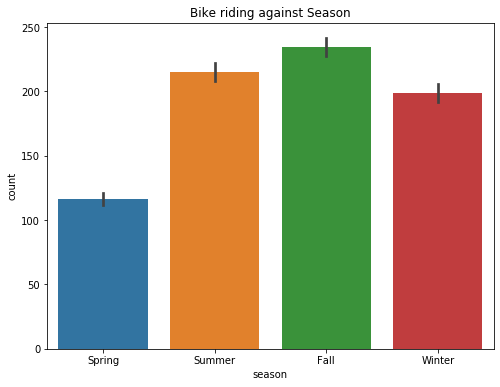

In [181]:
#Reviewing data visually
plt.figure(figsize=(8,6))
sb.barplot(x = 'season', y= 'count', data=df_train)
plt.title('Bike riding against Season')
plt.show();

#### Looks like 'Summer' and 'Fall' are Biking Seasons ...!!

### Working with Weather Feature

In [174]:
#As like season let's map weather as well
df_train['weather'] = df_train['weather'].map({1:'Clear-Cloudy', 2:'Misty-Cloudy', 3:'Light Rain-Storm', 4:'Rain-'})

In [176]:
df_train['weather'].dtype

dtype('O')

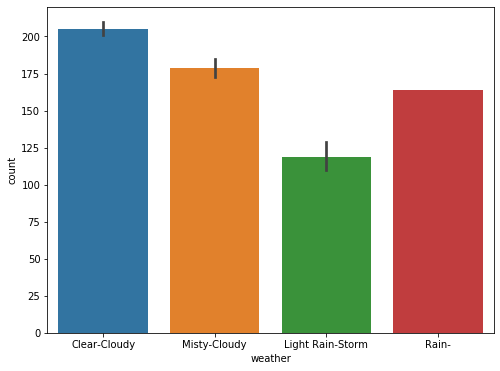

In [183]:
#Let's plot it
plt.figure(figsize=(8,6))
sb.barplot(x='weather', y='count', data=df_train)
plt.show();

In [187]:
df_train.weather.value_counts()

Clear-Cloudy        7192
Misty-Cloudy        2834
Light Rain-Storm     859
Rain-                  1
Name: weather, dtype: int64

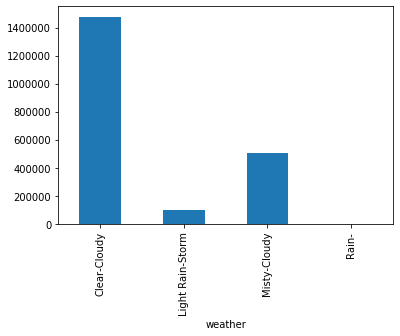

In [199]:
df_train.groupby('weather')['count'].agg('sum').plot(kind='bar');

In [200]:
df_train.groupby('weather')['count'].sum()

weather
Clear-Cloudy        1476063
Light Rain-Storm     102089
Misty-Cloudy         507160
Rain-                   164
Name: count, dtype: int64

In [193]:
df_train[df_train['weather'] == 'Rain-']

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year_X,month_X,weekday_X,hour_X,date_X
5631,2012-01-09 18:00:00,Spring,0,1,Rain-,8.2,11.365,86,6.0032,6,158,164,2012,January,Monday,18,9


### Continue with Holiday Feature

In [177]:
df_train.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [29]:
#Remove few cols from dataset to build test model
dcols = ['datetime', 'casual', 'registered', 'count']

#Save del col values to new dataframe
df_target = df_train[dcols]

df_target.head()

,datetime,casual,registered,count
0,2011-01-01 00:00:00,3,13,16
1,2011-01-01 01:00:00,8,32,40
2,2011-01-01 02:00:00,5,27,32
3,2011-01-01 03:00:00,3,10,13
4,2011-01-01 04:00:00,0,1,1


In [30]:
df_train.shape

(10886, 16)

In [31]:
#Delete the cols
df_train.drop(dcols, inplace=True, axis=1)

In [32]:
df_train.shape

(10886, 12)

In [33]:
df_train.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year_X,month_X,day_X,hour_X
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,2


In [34]:
#Set the target y value
y_train = df_target['count'].values

In [119]:
df_temp = pd.to_datetime(df_target['datetime'])
df_temp.dtype

dtype('<M8[ns]')

In [149]:
#Setting up week day in training data
df_temp.apply(lambda x: calendar.day_name[x.weekday()])

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
           ...    
10881    Wednesday
10882    Wednesday
10883    Wednesday
10884    Wednesday
10885    Wednesday
Name: datetime, Length: 10886, dtype: object

In [132]:
x = df_temp[0]# -> Sat
x

Timestamp('2011-01-01 00:00:00')

In [146]:
print('Day:',calendar.day_name[x.weekday()])
print('Month:', calendar.month_name[x.month])

Day: Saturday
Month: January


In [145]:
calendar.day_name[x.weekday()]

'Saturday'

In [142]:
calendar.day_name[datetime.today().weekday()]

'Friday'

---

In [38]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=1000, random_state=42, objective='reg:squarederror')

In [39]:
model.fit(df_train.values, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [41]:
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    return np.sqrt(np.mean((np.log1p(y) - np.log1p(y_pred))**2))

In [44]:
pred = model.predict(df_train.values)
print('RMSLE: ', rmsle(y_train, pred))

RMSLE:  nan


In [55]:
s_temp = pd.Series(data=pred, name='BikeCount')

In [59]:
rmsle(y_train, round(s_temp))

inf

In [40]:
df_test.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [60]:
df_temp = pd.to_datetime(df_test['datetime'])
#Add date, month, year, hour to test set
df_test['year_X'] = df_temp.apply(lambda x: x.year)
df_test['month_X'] = df_temp.apply(lambda x: x.month)
df_test['day_X'] = df_temp.apply(lambda x: x.day)
df_test['hour_X'] = df_temp.apply(lambda x: x.hour)

In [62]:
df_test.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year_X,month_X,day_X,hour_X
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2


In [63]:
s_test_datetime = df_test['datetime']
df_test.drop('datetime', inplace=True, axis=1)

In [64]:
df_test.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year_X,month_X,day_X,hour_X
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2


In [65]:
df_train.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year_X,month_X,day_X,hour_X
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,2


In [66]:
test_pred = model.predict(df_test.values)

In [72]:
len(test_pred[test_pred<0])

376

In [74]:
len(y_train[y_train<1])

0

In [75]:
len(test_pred)

6493

In [76]:
s_test_pred = pd.Series(data=test_pred, name='TestBikeCount')

In [93]:
s_test_pred.dtype

dtype('float32')

In [107]:
s_test_pred = s_test_pred.apply(lambda x: 0 if x < 0 else x)

In [111]:
s_test_pred = s_test_pred.apply(lambda x:round(x))

In [112]:
df_submit = pd.DataFrame({'datetime':s_test_datetime, 'count':s_test_pred})
df_submit.head()

,datetime,count
0,2011-01-20 00:00:00,13
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [113]:
df_submit.shape

(6493, 2)

In [114]:
df_submit.to_csv('submission/Naive_Submision.csv', index=False)

### Scored 0.80